In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom

1. Đọc dữ liệu và hiển thị 10 dòng đầu tiên

In [224]:
df = pd.read_csv('bds.csv')
df.head(10)

,time,title,poster_temp,area_temp,final_price,type,acreage
0,2020-06-07,"Bán nhà tại p.Phạm Ngũ Lão, Quận 1, 25m2, 4.2 TỶ",môi giới,tp hồ chí minh,4.200000e+09,nhà,25.00
1,2020-08-07,Chung cư Opal Boulevard 95.49m² 3PN,môi giới,tp hồ chí minh,3.308559e+09,chung cư,95.49
2,2020-05-07,"Bán nhà Phú Lãm. 34m*4T. tặng 3 điều hòa, 1,62 tỷ",môi giới,hà nội,1.620000e+09,nhà,34.00
3,2020-07-07,Nhà trệt lầu . Hùynh thúc kháng,môi giới,cần thơ,1.840000e+09,nhà,-1.00
4,2020-06-07,"Đất Lê Văn Lương, 85m2, Sổ riêng, Hẻm xe hơi, ...",môi giới,tp hồ chí minh,2.250000e+09,đất,85.00
5,2020-04-07,Bán nhà Huyện Hóc Môn 34m²,khác,tp hồ chí minh,2.200000e+09,nhà,34.00
6,2020-06-07,Nhà 1 lửng 2PN đất 63m2 cực đẹp ĐS 17 Linh Trung,khác,tp hồ chí minh,3.350000e+09,nhà,63.00
7,2020-05-07,Đất mặt tiền Phú Nông - Vĩnh Ngọc hàng hiếm,môi giới,khánh hòa,2.073000e+09,đất,-1.00
8,2020-03-07,Nhà 1 trệt 1 lầu đường 44 - kdc 586 - cái răng,môi giới,cần thơ,2.350000e+09,nhà,-1.00
9,2020-08-07,Nhà lửng trục chính An Gia,môi giới,cần thơ,1.100000e+09,nhà,-1.00


2. Tìm hiểu thông tin về dữ liệu

a, Số lượng mỗi loại (type) bất động sản có trong dữ liệu

In [225]:

df['type'].value_counts()

nhà         147416
khác         63968
đất          61352
chung cư      9909
Name: type, dtype: int64

b,

i, Số lượng bất động sản của mỗi loại theo từng cách rao bán

In [226]:

df.groupby(['type', 'poster_temp']).size().unstack(fill_value=0)

poster_temp,khác,môi giới
type,,
chung cư,2903,7006
khác,11024,52944
nhà,30096,117320
đất,14914,46438


b,

ii, Biểu đồ hình tròn thể hiện phần trăm của từng loại bất động sản theo từng phương thức rao bán

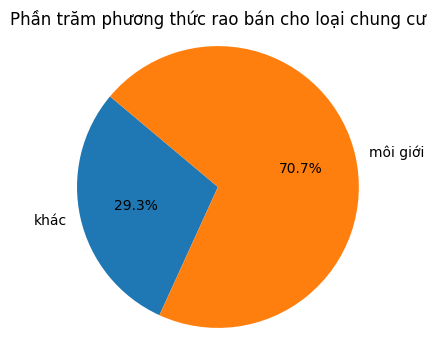

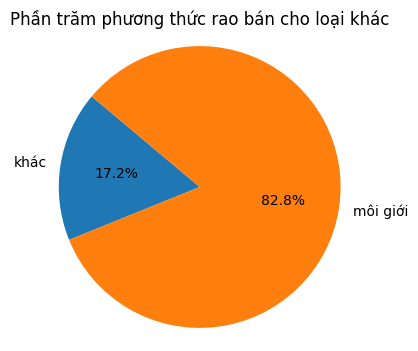

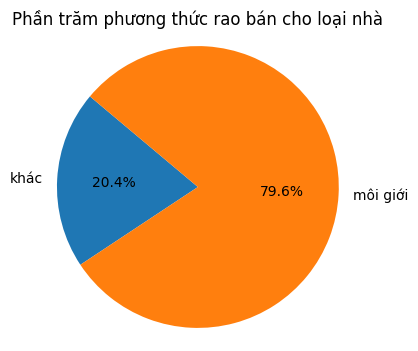

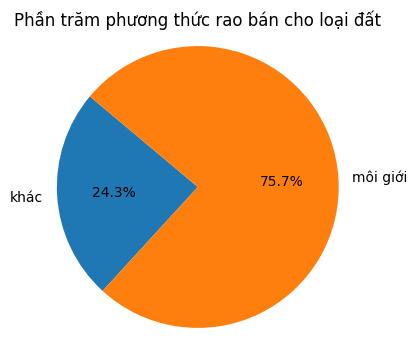

In [227]:

pivot_table = df.pivot_table(index='type', columns='poster_temp', values='final_price', aggfunc='count', fill_value=0)
# Lấy các cột của pivot table
categories = pivot_table.index
methods = pivot_table.columns

# Tạo một biểu đồ hình tròn cho mỗi loại bất động sản
for category in categories:
    data = pivot_table.loc[category]
    plt.figure(figsize=(4, 4))
    plt.pie(data, labels=methods, autopct='%1.1f%%', startangle=140)
    plt.title(f'Phần trăm phương thức rao bán cho loại {category}')
    plt.axis('equal')  # Để đảm bảo biểu đồ là hình tròn
    plt.show()


Nhận xét: 

Với tất cả các mô hình bất động sản, phương thức môi giới được sử dụng nhiều hơn

Tỉ lệ phần trăm về phương thức rao bán của các mô hình khá tương đồng

c.
 
i. Tạo bảng dữ liệu mới chỉ có 3 vùng(tp.hcm, hà nội, đà nẵng)

In [228]:

selected_areas = ['tp hồ chí minh', 'hà nội', 'đà nẵng']
df_area_temp = df.loc[df['area_temp'].isin(selected_areas)]
df_area_temp.head(10)
num_rows = df_area_temp.shape[0]
print("Số dòng của DataFrame là:", num_rows)


Số dòng của DataFrame là: 191216


c

ii. Từ bảng dữ liệu trên hãy so sánh các đại lượng thống kê giá trị như trung bình, trung vị, độ lệch chuẩn của giá bất động sản của mỗi vùng

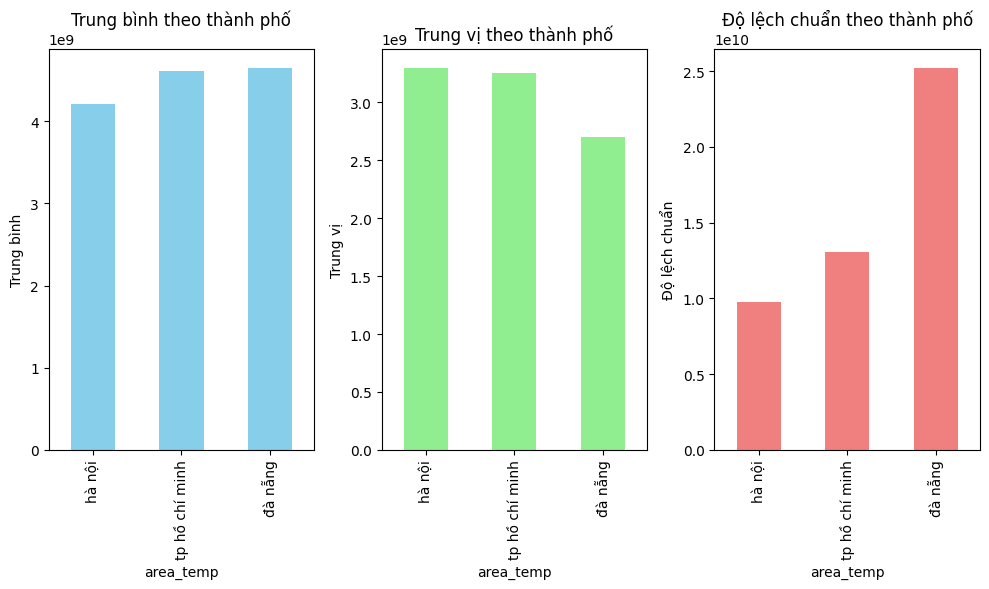

In [229]:
# Lọc dữ liệu chỉ theo các thành phố cụ thể
cities = ['tp hồ chí minh', 'hà nội', 'đà nẵng']
df_area_temp = df[df['area_temp'].isin(cities)]

# Trung bình giá
mean_prices = df_area_temp.groupby('area_temp')['final_price'].mean()

# Trung vị giá
median_prices = df_area_temp.groupby('area_temp')['final_price'].median()

# Độ lệch chuẩn giá
std_deviation = df_area_temp.groupby('area_temp')['final_price'].std()

plt.figure(figsize=(10, 6))

# Biểu đồ cột cho trung bình giá
plt.subplot(131)
mean_prices.plot(kind='bar', color='skyblue')
plt.title("Trung bình theo thành phố")
plt.ylabel("Trung bình")

# Biểu đồ cột cho trung vị giá
plt.subplot(132)
median_prices.plot(kind='bar', color='lightgreen')
plt.title("Trung vị theo thành phố")
plt.ylabel("Trung vị")

# Biểu đồ cột cho độ lệch chuẩn giá
plt.subplot(133)
std_deviation.plot(kind='bar', color='lightcoral')
plt.title("Độ lệch chuẩn theo thành phố")
plt.ylabel("Độ lệch chuẩn")

plt.tight_layout()
plt.show()

Nhận xét: 

Độ lệnh chuẩn của đà nẵng lớn, tức là dữ liệu không ổn định

Ngược lại Hà Nội lệnh khá thấp, dữ liệu bình ổn

Giá trị trung bình của 3 nơi khá gần nhau

d.

i.Tạo bảng dữ liệu có diện tích (acreage khác -1) và cho biết số dòng trong bảng dữ liệu mới

In [230]:
# Lọc các dòng có diện tích khác -1
df_acreage_1 = df[df['acreage'] != -1]

num_rows_filtered = df_acreage_1.shape[0]
print("Số dòng trong bảng dữ liệu mới là:", num_rows_filtered)


Số dòng trong bảng dữ liệu mới là: 103694


d.

ii. Vẽ biểu đồ thể hiện số lượng bất động sản có diện tích trong mô tả (acreage khác -1) của mỗi loại phương thức rao bán (poster_temp)

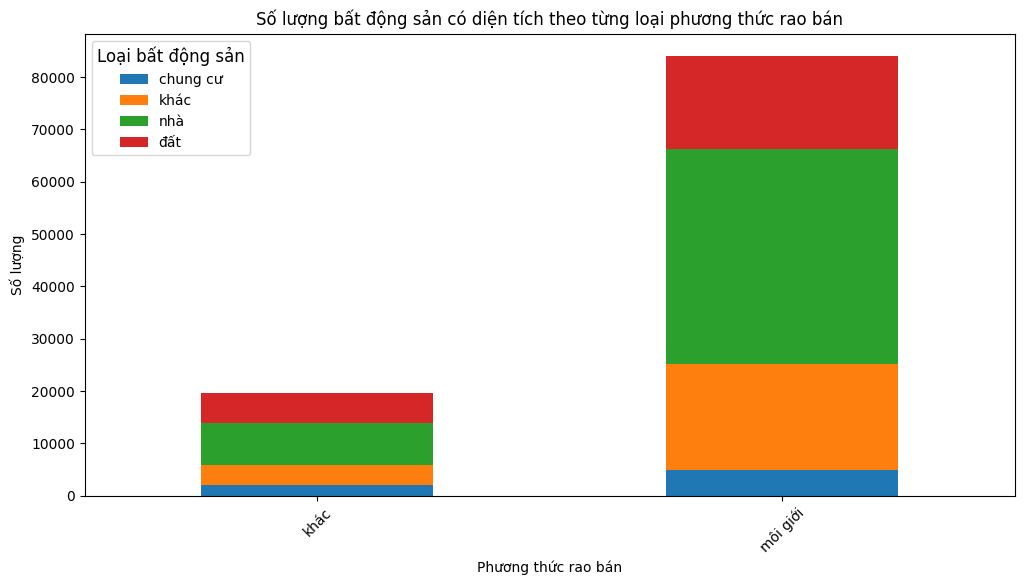

In [231]:
pivot_table = df_acreage_1.groupby(['poster_temp', 'type'])['acreage'].count().unstack(fill_value=0)

ax = pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Số lượng bất động sản có diện tích theo từng loại phương thức rao bán")
plt.xlabel("Phương thức rao bán")
plt.ylabel("Số lượng")
plt.xticks(rotation=45)
plt.legend(title='Loại bất động sản', title_fontsize='12')
plt.show()



Nhận xét:

Phương thức môi giới được sử dụng nhiều hơn so với các phương thức khác (chênh lệnh rất lớn)

Nhìn chung ở 2 phương thức thì nhà là mô hình được rao bán nhiều nhất, mô hình ít nhất là chung cư

3. 

a. Chuyển dữ liệu time thành datatime, vẽ biểu đồ thể hiện số lượng bất động sản được bán theo từng tháng trong năm 2020

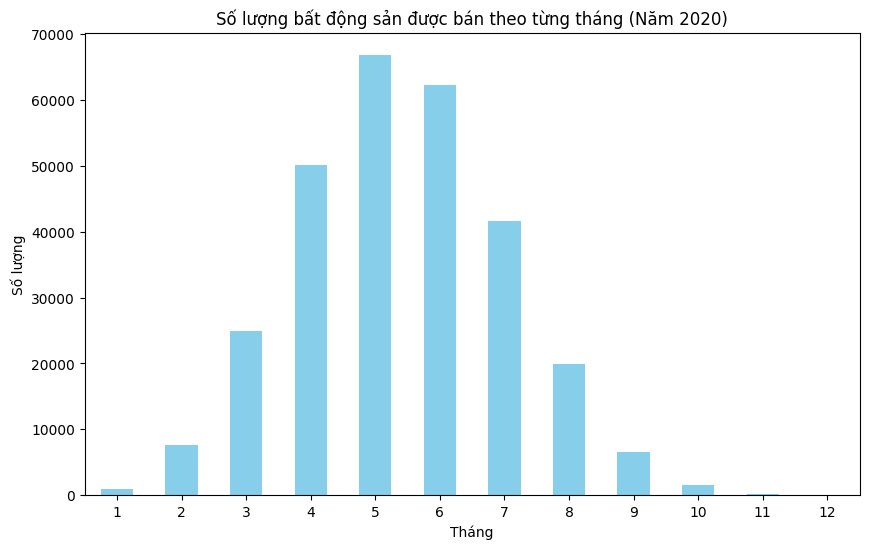

In [232]:
df['time'] = pd.to_datetime(df['time'])

df_2020 = df[df['time'].dt.year == 2020]

pivot_table = df_2020.groupby(df_2020['time'].dt.month)['title'].count()

plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', color='skyblue')
plt.title("Số lượng bất động sản được bán theo từng tháng (Năm 2020)")
plt.xlabel("Tháng")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.show()


Nhận xét: Số lượng bất động sản được bán ra vào năm 2020 theo tháng

Tháng 4 đến tháng 7 bán được nhiều, cao nhất là tháng 5

Các tháng còn lại bán được khá ít, điển hình tháng 12 gần như không đáng kể

3.

b. Vẽ mối tương quan giữa giá bất động sản và diện tích của bất động sản đối với mô hình 'nhà' (có acreage <800 và acreage > -1) tại tp hồ chí minh

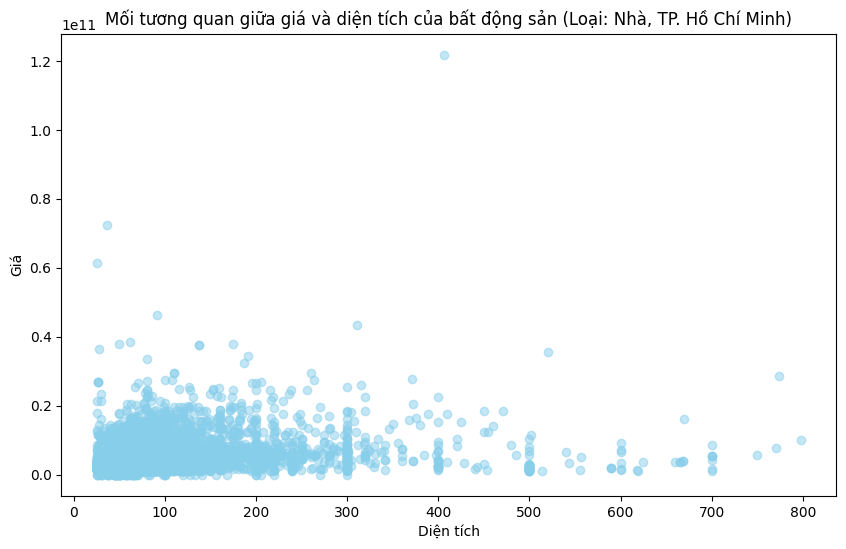

In [233]:
df_hcm_house = df[(df['type'] == 'nhà') & (df['acreage'] < 800) & (df['acreage'] != -1) & (df['area_temp'] == 'tp hồ chí minh')]

plt.figure(figsize=(10, 6))
plt.scatter(df_hcm_house['acreage'], df_hcm_house['final_price'], color='skyblue', alpha=0.5)
plt.title("Mối tương quan giữa giá và diện tích của bất động sản (Loại: Nhà, TP. Hồ Chí Minh)")
plt.xlabel("Diện tích")
plt.ylabel("Giá")
plt.show()


Nhận xét: Giá và diện tích của bất động sản 'nhà' ở Hồ Chí Minh có tương quan thuận với nhau

4. Chọn loại biểu đồ phù hợp để khảo sát mối quan hệ giữa giá trung bình của bất động sản loại 'nhà' và giá bất động sản loại 'đất' theo từng tháng

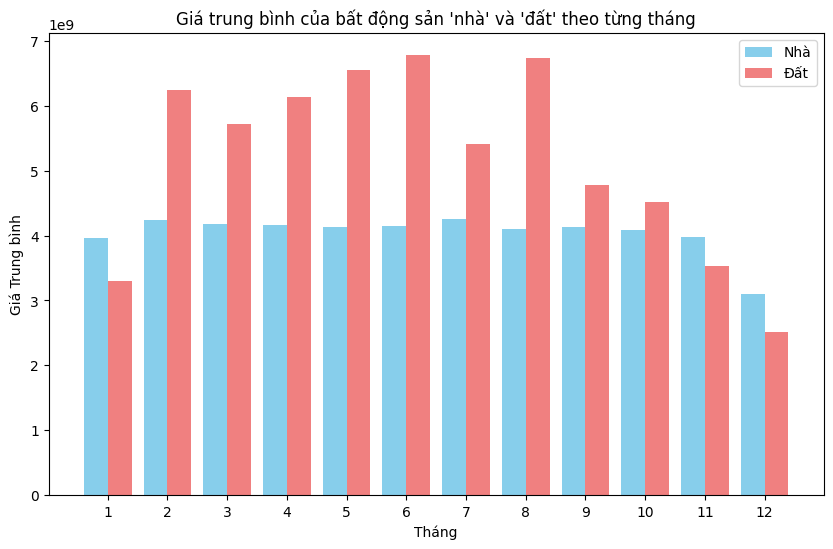

In [234]:
# Lọc dữ liệu cho loại 'nhà'
df_nha = df[(df['type'] == 'nhà')]

# Lọc dữ liệu cho loại 'đất'
df_dat = df[(df['type'] == 'đất')]

# Nhóm dữ liệu theo tháng và tính giá trung bình cho từng loại
avg_price_nha = df_nha.groupby(df_nha['time'].dt.month)['final_price'].mean()
avg_price_dat = df_dat.groupby(df_dat['time'].dt.month)['final_price'].mean()

plt.figure(figsize=(10, 6))
plt.bar(avg_price_nha.index - 0.2, avg_price_nha.values, width=0.4, label='Nhà', color='skyblue')
plt.bar(avg_price_dat.index + 0.2, avg_price_dat.values, width=0.4, label='Đất', color='lightcoral')
plt.title("Giá trung bình của bất động sản 'nhà' và 'đất' theo từng tháng")
plt.xlabel("Tháng")
plt.ylabel("Giá Trung bình")
plt.xticks(avg_price_nha.index)
plt.legend()
plt.show()


Nhận xét:

Nhìn chung, giá của đất cao hơn giá của nhà từ tháng 2 đến tháng 10.

Vào tháng 11, 12 và tháng 1 thì giá nhà lại có xu hướng cao hơn giá đất.

Vậy nếu muốn mua đất thì nên mua vào các tháng 11, 12 và 1. Muốn mua nhà thì mua vào các tháng còn lại.